In [1]:
#Connecting to google drive
from google.colab import drive
import numpy as np
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Importing .npz file
from google.colab import files
uploaded = files.upload()

Saving breastmnist.npz to breastmnist.npz


In [3]:
#Libraries to load and display dataset
import numpy as np
import pandas as pd
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.utils import np_utils
from skimage.util import montage

#libraries to build our neural netwrok model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras import backend as k

from keras.utils import to_categorical
from keras import optimizers
from keras.optimizers import SGD,Adam
from keras.applications import ResNet101
from tensorflow.python.keras import regularizers

from keras.models import Model
from tensorflow.keras.utils import img_to_array,array_to_img

#librariy to augment our dataset images
from keras.preprocessing.image import ImageDataGenerator

#libraries to calculate evalution scores of our model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


#to display our images and run eagerly our nueral model
%matplotlib inline 
tf.config.run_functions_eagerly(True)

#Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Loading our dataset
breast_dataset = np.load("breastmnist.npz")

#iterating on our dataset to see the keys
for i in breast_dataset.iterkeys():
  print(i)

train_images
val_images
test_images
train_labels
val_labels
test_labels


In [5]:
#Storing our values from the keys of the dictionary to a variable
x_train_breast_res101 = breast_dataset['train_images']
x_test_breast_res101 = breast_dataset['test_images']
y_train_breast_res101 = breast_dataset['train_labels']
y_test_breast_res101 = breast_dataset['test_labels']
val_images_breast_res101 = breast_dataset['val_images']
val_labels_breast_res101 = breast_dataset['val_labels']

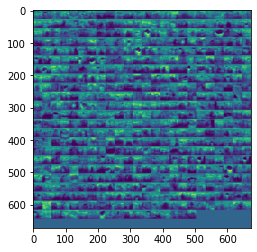

In [6]:
#Visualising our dataset using montage function
breast_dataset_montage = montage(x_train_breast_res101)
plt.imshow(breast_dataset_montage)
plt.show()

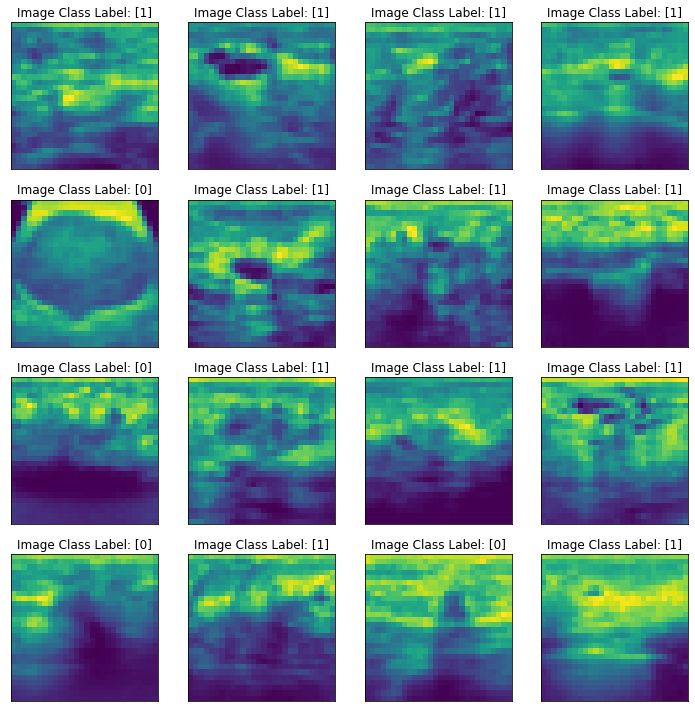

In [7]:
#Visualising Images and Classes
from numpy.ma.extras import column_stack
display_images = x_train_breast_res101  
display_labels = y_train_breast_res101  

# Define the number of rows and columns for displaying images
rows = 4
cols = 4
num_images = rows * cols

# Create a figure object with specified size and display the images
fig, axes = plt.subplots(rows, cols, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    if i < num_images:
        ax.imshow(display_images[i])
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(f'Image Class Label: {display_labels[i]}')
    else:
        ax.axis('off')
plt.tight_layout()
plt.show()

In [8]:
#checking the shape of our data.
print(x_train_breast_res101.shape)
print(x_test_breast_res101.shape)
print(y_train_breast_res101.shape)
print(y_test_breast_res101.shape)

(546, 28, 28)
(156, 28, 28)
(546, 1)
(156, 1)


In [9]:
#Converting the type as float
x_train_breast_res101 = x_train_breast_res101.astype('float32')
x_test_breast_res101 = x_test_breast_res101.astype('float32')
val_images_breast_res101 = val_images_breast_res101.astype('float32')
print(x_train_breast_res101.shape)
print(x_test_breast_res101.shape)

(546, 28, 28)
(156, 28, 28)


In [10]:
#expanding the dimensions of our data
x_train_breast_res101 = np.expand_dims(x_train_breast_res101, axis=-1)
x_test_breast_res101 = np.expand_dims(x_test_breast_res101, axis=-1)
val_images_breast_res101 = np.expand_dims(val_images_breast_res101, axis=-1)
print(x_train_breast_res101.shape)
print(x_test_breast_res101.shape)
print(val_images_breast_res101.shape)

(546, 28, 28, 1)
(156, 28, 28, 1)
(78, 28, 28, 1)


In [11]:

#Augmenting our data to furthur evaluate our model
x_train_breast_res101_1 = x_train_breast_res101
x_train_breast_res101_2 = x_train_breast_res101
datagen = ImageDataGenerator(
    rotation_range=25,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    shear_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)
#fitting our original dataset into our augmentor model
datagen.fit(x_train_breast_res101_1)

augmented_dataset_1 = x_train_breast_res101_1

datagen_2 = ImageDataGenerator(
    rotation_range=50,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.1,
    shear_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)
datagen_2.fit(x_train_breast_res101_2)

augmented_dataset_2 = x_train_breast_res101_2

print(x_train_breast_res101.shape)
print(augmented_dataset_1.shape)
print(augmented_dataset_2.shape)

x_train_breast_res101 = np.concatenate((x_train_breast_res101,augmented_dataset_1,augmented_dataset_2))
print(x_train_breast_res101.shape)

(546, 28, 28, 1)
(546, 28, 28, 1)
(546, 28, 28, 1)
(1638, 28, 28, 1)


In [12]:

#Augmenting our data to furthur evaluate our model
y_train_breast_res101_1 = y_train_breast_res101
y_train_breast_res101_2 = y_train_breast_res101


y_train_breast_res101 = np.concatenate((y_train_breast_res101,y_train_breast_res101_1,y_train_breast_res101_2))
print(y_train_breast_res101.shape)

(1638, 1)


In [13]:
#converting the grayscale image to RGB values
x_train_breast_res101 = tf.image.grayscale_to_rgb(tf.convert_to_tensor(x_train_breast_res101))
x_test_breast_res101 = tf.image.grayscale_to_rgb(tf.convert_to_tensor(x_test_breast_res101))
val_images_breast_res101 = tf.image.grayscale_to_rgb(tf.convert_to_tensor(val_images_breast_res101))

In [14]:
# Resize the images to 32,32,3
x_train_breast_res101 = np.asarray([img_to_array(array_to_img(im, scale=False).resize((32,32))) for im in x_train_breast_res101])
x_test_breast_res101 = np.asarray([img_to_array(array_to_img(im, scale=False).resize((32,32))) for im in x_test_breast_res101])
val_images_breast_res101 = np.asarray([img_to_array(array_to_img(im, scale=False).resize((32,32))) for im in val_images_breast_res101])

print(x_train_breast_res101.shape)
print(x_test_breast_res101.shape)
print(val_images_breast_res101.shape)

(1638, 32, 32, 3)
(156, 32, 32, 3)
(78, 32, 32, 3)


In [15]:
#converting our values from range[0,255] to range[0,1]
x_train_breast_res101 /= 255.0
x_test_breast_res101 /= 255.0
val_images_breast_res101 /= 255.0

In [16]:
#Tranforming our data to categorically.
num_classes = 2
y_train_breast_res101 = tf.keras.utils.to_categorical(y_train_breast_res101, num_classes)
y_test_breast_res101 = tf.keras.utils.to_categorical(y_test_breast_res101, num_classes)

In [17]:
#labels for breast dataset from the above link
class_labels = [
    "malignant",
    "normal, benign",
]

In [18]:
#Building Nueral network model
resnet_model=ResNet101(include_top=False,weights='imagenet',input_shape=(32,32,3))

# Freeze the base model layers
for layer in resnet_model.layers:
    layer.trainable = False

#adding layers to our model
x = resnet_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(2, activation='sigmoid')(x)

#plotting the summary
model = Model(inputs=resnet_model.input, outputs=predictions)
model.summary()

171446536/171446536 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 38, 38, 3)    0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 16, 16, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 16, 16, 64)   256         ['conv1_conv[0][0]']             
                           

In [19]:
#Compile the model
model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

In [20]:
#Fitting  neural network model to the dataset.
batch_size = 32
epochs = 20
model.fit(x_train_breast_res101, y_train_breast_res101, batch_size=batch_size, epochs=epochs, validation_data=(x_test_breast_res101,y_test_breast_res101),shuffle=True)
model.save("/content/drive/MyDrive/BREAST_RESNET101.h5")

Epoch 1/20
52/52 [==============================] - 26s 324ms/step - loss: 0.5989 - accuracy: 0.7234 - val_loss: 0.5801 - val_accuracy: 0.7308
Epoch 2/20
52/52 [==============================] - 20s 381ms/step - loss: 0.5703 - accuracy: 0.7308 - val_loss: 0.5401 - val_accuracy: 0.7308
Epoch 3/20
52/52 [==============================] - 16s 318ms/step - loss: 0.5582 - accuracy: 0.7302 - val_loss: 0.5519 - val_accuracy: 0.7692
Epoch 4/20
52/52 [==============================] - 16s 309ms/step - loss: 0.5517 - accuracy: 0.7338 - val_loss: 0.5732 - val_accuracy: 0.7821
Epoch 5/20
52/52 [==============================] - 17s 325ms/step - loss: 0.5510 - accuracy: 0.7265 - val_loss: 0.5090 - val_accuracy: 0.7692
Epoch 6/20
52/52 [==============================] - 16s 313ms/step - loss: 0.5292 - accuracy: 0.7332 - val_loss: 0.4956 - val_accuracy: 0.7628
Epoch 7/20
52/52 [==============================] - 17s 319ms/step - loss: 0.5238 - accuracy: 0.7350 - val_loss: 0.5705 - val_accuracy: 0.7308

In [21]:
#creating our confusion matrix for our dataset 
y_pred_breast_res101 = model.predict(x_test_breast_res101) 
y_pred_breast_res101 = np.argmax(y_pred_breast_res101, axis=1)
y_test_breast_res101 = np.argmax(y_test_breast_res101, axis=1)
cm = confusion_matrix(y_test_breast_res101, y_pred_breast_res101)
print(cm)

5/5 [==============================] - 1s 147ms/step
[[  6  36]
 [  0 114]]


In [22]:
#Evaluation scores
precision = precision_score(y_test_breast_res101, y_pred_breast_res101,average = 'macro')
accuracy = balanced_accuracy_score(y_test_breast_res101, y_pred_breast_res101)
recall = recall_score(y_test_breast_res101, y_pred_breast_res101,average = 'macro')
f1 = f1_score(y_test_breast_res101, y_pred_breast_res101,average = 'macro')

print("The precision score for breast Dataset RESNET101 Model is: ", precision)
print("The accuracy score for breast Dataset RESNET101 Model is: ", accuracy)
print("The recall score for breast Dataset RESNET101 Model is: ", recall)
print("The f1 score for breast Dataset RESNET Model01 is: ", f1)


The precision score for breast Dataset RESNET101 Model is:  0.88
The accuracy score for breast Dataset RESNET101 Model is:  0.5714285714285714
The recall score for breast Dataset RESNET101 Model is:  0.5714285714285714
The f1 score for breast Dataset RESNET Model01 is:  0.5568181818181819


In [23]:
#Validation of the model using validation images given in the source data
for i in range(len(val_images_breast_res101)):
  val_img = val_images_breast_res101[i]
  img = tf.expand_dims(val_img, axis=0)
  results = model.predict(img)
  single_result = results[0]
  most_likely = int(np.argmax(single_result))
  class_likely = single_result[most_likely]
  class_label = class_labels[most_likely]
  print("This image is {} - Likelihood: {:2f}".format(class_label,class_likely))

1/1 [==============================] - 0s 349ms/step
This image is normal, benign - Likelihood: 0.952637
1/1 [==============================] - 0s 170ms/step
This image is normal, benign - Likelihood: 0.506735
1/1 [==============================] - 0s 169ms/step
This image is normal, benign - Likelihood: 0.737429
1/1 [==============================] - 0s 172ms/step
This image is normal, benign - Likelihood: 0.730511
1/1 [==============================] - 0s 173ms/step
This image is normal, benign - Likelihood: 0.825400
1/1 [==============================] - 0s 164ms/step
This image is normal, benign - Likelihood: 0.916718
1/1 [==============================] - 0s 163ms/step
This image is normal, benign - Likelihood: 0.908266
1/1 [==============================] - 0s 161ms/step
This image is normal, benign - Likelihood: 0.550791
1/1 [==============================] - 0s 158ms/step
This image is normal, benign - Likelihood: 0.813188
1/1 [==============================] - 0s 164ms/step
Th